#### Importando bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



#### Carregando arquivos 

In [3]:
# Carregando o arquivo usando o pandas com espaço em branco como separador
features = pd.read_csv("./UCI HAR Dataset/features.txt", sep='\s+', header=None)
# Carregando o arquivo usando o pandas com espaço em branco como separador
subject_train = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt", sep='\s+', header=None)
# Carregando o arquivo usando o pandas com espaço em branco como separador
X_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", sep='\s+', header=None)
# Definindo os nomes das colunas em X_train com base em features.txt
X_train.columns = features[1]
# Adicionando a coluna do subject_train como uma variável em X_train
X_train['Subject'] = subject_train[0]
# Criando um índice duplo composto pela ordem dos dados e pelo identificador do indivíduo
X_train = X_train.reset_index().set_index(['index', 'Subject'])
# Carregando o arquivo usando o pandas com espaço em branco como separador
subject_test = pd.read_csv("./UCI HAR Dataset/test/subject_test.txt", sep='\s+', header=None)
# Carregando o arquivo usando o pandas com espaço em branco como separador
X_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", sep='\s+', header=None)
# Definindo os nomes das colunas em X_train com base em features.txt
X_test.columns = features[1]
# Adicionando a coluna do subject_test como uma variável em X_test
X_test['Subject'] = subject_test[0]
# Criando um índice duplo composto pela ordem dos dados e pelo identificador do indivíduo
X_test = X_test.reset_index().set_index(['index', 'Subject'])
# Carregando y_train e y_test
y_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", sep='\s+', header=None)
y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", sep='\s+', header=None)


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Teste. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraindo 25% da base de treino como base de validação.

In [4]:
# Separando em base de treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rodando uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis. Vamos considerar as 3 variáveis com maior importância para os próximos passos.


In [5]:
# Rodando uma árvore com profundidade máxima 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [6]:
# Obtendo a importância das variáveis
importances = clf.feature_importances_

# Criando um dicionário que mapeia nomes de colunas (variáveis) para suas importâncias
feature_importance_dict = {feature_name: importance for feature_name, importance in zip(X_train.columns, importances)}

# Ordenando o dicionário pelas importâncias em ordem decrescente
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Obtendo as 3 variáveis mais importantes
top_3_variables = sorted_feature_importance[:3]

# Imprimindo as 3 variáveis mais importantes e suas importâncias
for variable, importance in top_3_variables:
    print(f"Variável: {variable}, Importância: {importance}")

Variável: tGravityAcc-mean()-X, Importância: 0.28028805368454934
Variável: angle(Y,gravityMean), Importância: 0.172169335584583
Variável: tGravityAccMag-std(), Importância: 0.13438131642443318


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construí uma árvore de decisão. Encontrei o melhor ```ccp_alpha``` utilizando a base de validação.

In [7]:
# Usando apenas as 3 melhores variáveis encontradas
variables = ['tGravityAcc-mean()-X', 'angle(Y,gravityMean)', 'tGravityAccMag-std()']
X_train_subset = X_train[variables]

# Criando uma árvore com a variável X_train_subset que contém as 3 variáveis consideradas mais importantes
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
clf.fit(X_train_subset, y_train)

# Calculando os ccp_alphas
caminho = clf.cost_complexity_pruning_path(X_train_subset, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

# Certificando que todos os valores são positivos
ccp_alphas = np.clip(ccp_alphas, 0, np.inf)

# Selecionando apenas valores únicos
ccp_alphas = np.unique(ccp_alphas)

# Criando uma coleção de dados com os ccp_alphas, considerando apenas 1 a cada 5 valores
ccp_alphas_subset = ccp_alphas[::5]


In [8]:
# visualizando os ccp_alphas escolhidos
ccp_alphas

array([0.00000000e+00, 1.00439763e-05, 1.44377323e-05, 1.44718861e-05,
       1.79701309e-05, 2.66406514e-05, 2.73075922e-05, 2.84988860e-05,
       3.30896156e-05, 3.79985146e-05, 4.05385223e-05, 4.66771567e-05,
       4.74222863e-05, 4.92461944e-05, 5.09611769e-05, 5.30330509e-05,
       7.05275460e-05, 9.68298011e-05, 9.88941816e-05, 1.05649546e-04,
       1.11718773e-04, 1.32938937e-04, 1.42392081e-04, 1.58274805e-04,
       1.59996776e-04, 1.66564309e-04, 1.95059042e-04, 2.03838157e-04,
       2.18923260e-04, 2.22362136e-04, 2.42986369e-04, 2.70829794e-04,
       3.31354788e-04, 3.72691625e-04, 3.84653431e-04, 3.94412519e-04,
       4.01132878e-04, 4.06874591e-04, 4.19354817e-04, 4.45599721e-04,
       4.68612800e-04, 4.76473110e-04, 5.01593251e-04, 6.08164866e-04,
       6.17704032e-04, 7.20616803e-04, 7.32984139e-04, 8.08172310e-04,
       8.65179143e-04, 8.90521566e-04, 8.94641468e-04, 9.14403994e-04,
       9.48847882e-04, 9.77162114e-04, 1.04790080e-03, 1.09361170e-03,
      

In [9]:
# Criando árvores para cada valor de ccp_alpha na coleção
clfs = []
for ccp_alpha in ccp_alphas_subset:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha)
    clf.fit(X_train_subset, y_train)  
    clfs.append(clf)

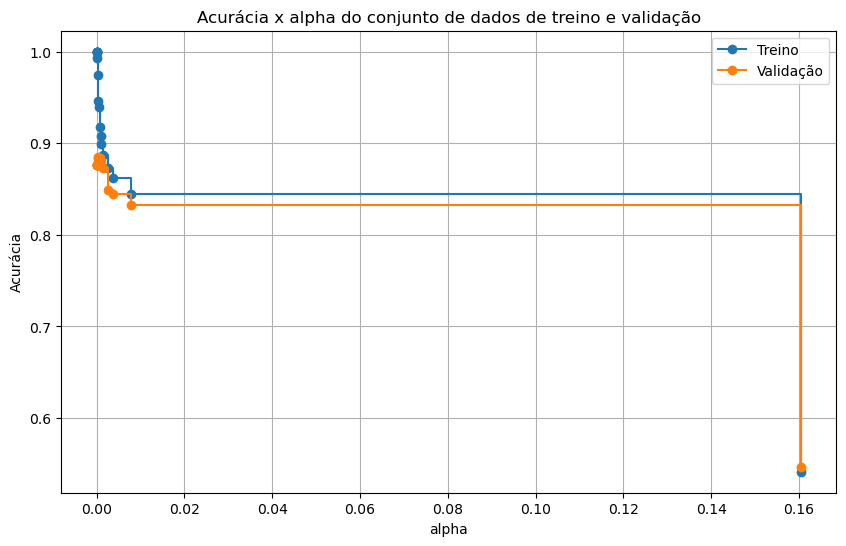

In [10]:
# Calculando a acurácia de treinamento e validação para cada árvore
train_scores = [clf.score(X_train_subset, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid[variables], y_valid) for clf in clfs]

# Visualizando a acurácia X alpha do conjunto de dados de treino e validação
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_subset, train_scores, marker='o', label="Treino", drawstyle="steps-post")
plt.plot(ccp_alphas_subset, valid_scores, marker='o', label="Validação", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Acurácia")
plt.title("Acurácia x alpha do conjunto de dados de treino e validação")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Pegando a 'melhor arvore'
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 88.52


DecisionTreeClassifier(ccp_alpha=0.00024298636921052516, random_state=2360873)

### 5. Avaliação do modelo

Avaliando a árvore encontrada no item anterior na base de testes.

In [12]:
# Verificando acurácia da melhor árvore na base de teste
acuracia_test = melhor_arvore.score(X_test[variables], y_test)

print(f"Acurácia: {acuracia_test*100:.2f}")

Acurácia: 73.26


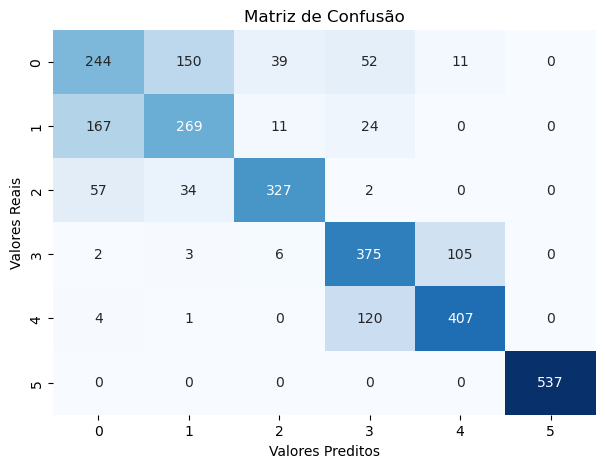

In [13]:
# Fazendo previsões no conjunto de teste
y_pred = melhor_arvore.predict(X_test[variables])

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plote a matriz de confusão como um heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()